In [1]:
import pickle
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
import sys
import os
from math import floor
import pandas as pd
import seaborn as sn
import datetime

def plothist(X, name, figsize=(5,5)) : 
    plt.figure(figsize=figsize)
    plt.title("{}".format(name))
    plt.ylabel('count')
    plt.xlabel('{}'.format(name))
    plt.hist(X, bins=30)
    plt.show()


with open('output_data/utils2014-2018.p', 'rb') as f :
    utils = pickle.load(f)

print(utils['description'])

■ DESCRIPTION OF UTILS 

G70 contains 52142 nodes with	 31730 ventures, 	85260 edges, dates, and amounts (and corrected) are edges labels.
G90 contains 58606 nodes with	 35560 ventures, 	100127 edges, dates, and amounts (and corrected) are edges labels.
G100 contains 64195 nodes with	 38836 ventures, 	114597 edges, dates, and amounts (and corrected) are edges labels.

These graphs are extracted respectively between :
	G70  - YEAR :2014 TRIMESTER : 1 and YEAR:2016 TRIMESTER : 4
	G90  - YEAR :2014 TRIMESTER : 1 and YEAR:2017 TRIMESTER : 2
	G100 - YEAR :2014 TRIMESTER : 1 and YEAR:2017 TRIMESTER : 4
INVTHRESHOLDINT is 262144 soit 2^18, if the number of the node is superior, it's an investor

Between G70 and G90,	 14867 edges are created, but only 5538 are from nodes in G70
Between G90 and G100,	 14470 edges are created, but only 5950 are from nodes in G90
↑ Above variables are contained in target_for_70 or _90 and target_for_70_possible and _90_possible

 It also means that there are 10^9

In [2]:
with open('base_data/descriptions_2014_and_later.p', 'rb') as f:
    DESCS = pickle.load(f)
print(DESCS.columns)
DESCS.columns = ["LOC","F_DATE","TOTFUND","N_ROUNDS","LR_DATE", "LR_VALUE", "FR_DATE", "HAS_S", "HAS_A", "HAS_B", "HAS_C", "HAS_D", "NB_INV", "CENT", "MAXINV_CENT", "SUM_INV_CENT", "MAXPORT", "NBART", "NEWSINC", "NBFOUNDERS","NBPREV"]

Index(['Location #startups', 'Founded Date', 'Total Funding',
       'Number of Rounds', 'Last Round Date', 'Last Round Funding',
       'First Round Date', 'Has Seed', 'Has A', 'Has B', 'Has C', 'Has D',
       'Nb investors', 'Centrality', 'Max Investor Centrality',
       'Sum Investor Centrality', 'Max Portfolio', 'Nb articles total',
       'News Increase', 'Nb Founders', 'Nb Previous Startups'],
      dtype='object')


In [3]:
DESCS[:4]

,LOC,F_DATE,TOTFUND,N_ROUNDS,LR_DATE,LR_VALUE,FR_DATE,HAS_S,HAS_A,HAS_B,...,HAS_D,NB_INV,CENT,MAXINV_CENT,SUM_INV_CENT,MAXPORT,NBART,NEWSINC,NBFOUNDERS,NBPREV
fooboo,201,2921,450000.0,1,1172,450000.0,1172,1,0,0,...,0,2,0,0,0,161,0,0.000000,0,0
interhomes-online,3,1095,149207.0,1,1092,149207.0,1092,1,0,0,...,0,0,0,0,0,0,0,0.000000,0,0
odesk,7436,6939,168800000.0,10,6305,50000000.0,2168,0,1,1,...,1,16,0,0,0,292,0,0.000000,1,2
fuze,1188,4382,330400000.0,7,1124,56700000.0,699,0,1,1,...,1,9,0,0,0,154,161,-0.243243,3,1


In [4]:
with open('base_data/word2vec_descs.p', 'rb') as f:
    W2V = pickle.load(f)

### II - Cherry-picking data and transforming it

In [5]:
import importlib
import var_transform
importlib.reload(var_transform);

####################################################################

■ LOC  will be used ?  NO
■ initial name Location #startups

raw_treatment :  {'initialName': 'Location #startups', 'shouldUse': False} 

####################################################################

■ F_DATE  will be used ?  YES
■ initial name Founded Date

raw_treatment :  {'initialName': 'Founded Date', 'shouldUse': True, 'nbtransform': 1, 'farray': [<function logPerso at 0x7f62dce3a2f0>], 'names': ['LOG_F_DATE']} 



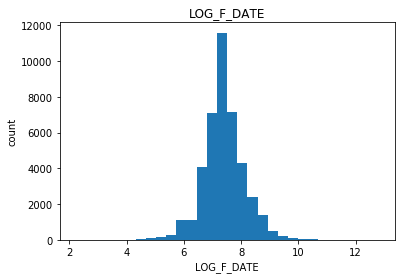

####################################################################

■ TOTFUND  will be used ?  YES
■ initial name Total Funding

raw_treatment :  {'initialName': 'Total Funding', 'shouldUse': True, 'nbtransform': 1, 'farray': [<function logPerso at 0x7f62dce3a2f0>], 'names': ['LOG_TOTFUND']} 



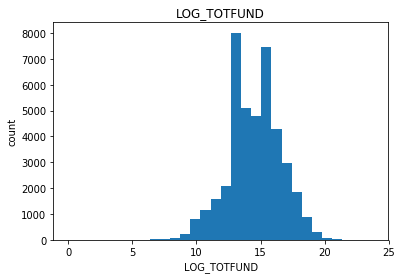

####################################################################

■ N_ROUNDS  will be used ?  NO
■ initial name Number of Rounds

raw_treatment :  {'initialName': 'Number of Rounds', 'shouldUse': False} 

####################################################################

■ LR_DATE  will be used ?  YES
■ initial name Last Round Date

raw_treatment :  {'initialName': 'Last Round Date', 'shouldUse': True, 'nbtransform': 1, 'farray': [<function logPerso at 0x7f62dce3a2f0>], 'names': ['LOG_LR_DATE']} 



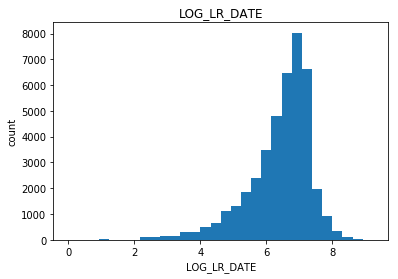

####################################################################

■ LR_VALUE  will be used ?  YES
■ initial name Last Round Funding

raw_treatment :  {'initialName': 'Last Round Funding', 'shouldUse': True, 'nbtransform': 1, 'farray': [<function logPerso at 0x7f62dce3a2f0>], 'names': ['LOG_LR_VALUE']} 



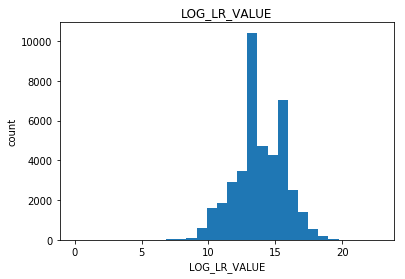

####################################################################

■ FR_DATE  will be used ?  YES
■ initial name First Round Date

raw_treatment :  {'initialName': 'First Round Date', 'shouldUse': True, 'nbtransform': 1, 'farray': [<function logPerso at 0x7f62dce3a2f0>], 'names': ['LOG_FR_DATE']} 



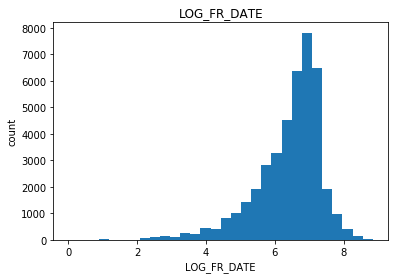

####################################################################

■ HAS_S  will be used ?  YES
■ initial name Has Seed

raw_treatment :  {'initialName': 'Has Seed', 'shouldUse': True, 'nbtransform': 0, 'farray': [], 'names': []} 



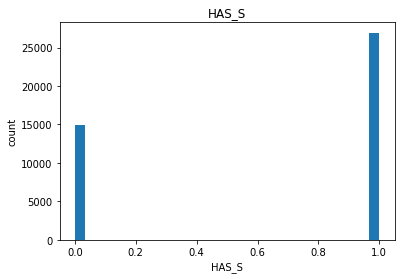

####################################################################

■ HAS_A  will be used ?  YES
■ initial name Has A

raw_treatment :  {'initialName': 'Has A', 'shouldUse': True, 'nbtransform': 0, 'farray': [], 'names': []} 



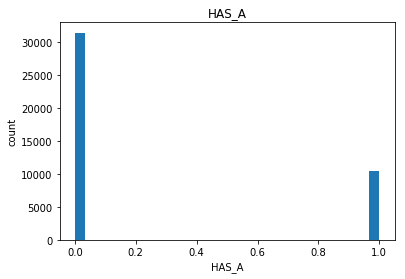

####################################################################

■ HAS_B  will be used ?  YES
■ initial name Has B

raw_treatment :  {'initialName': 'Has B', 'shouldUse': True, 'nbtransform': 0, 'farray': [], 'names': []} 



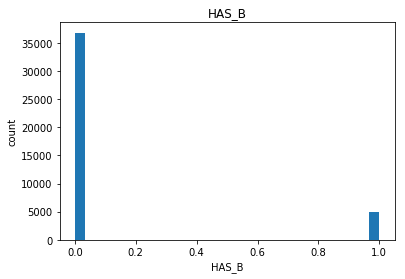

####################################################################

■ HAS_C  will be used ?  YES
■ initial name Has C

raw_treatment :  {'initialName': 'Has C', 'shouldUse': True, 'nbtransform': 0, 'farray': [], 'names': []} 



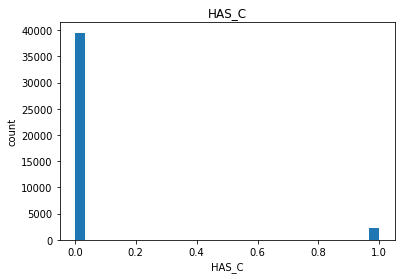

####################################################################

■ HAS_D  will be used ?  YES
■ initial name Has D

raw_treatment :  {'initialName': 'Has D', 'shouldUse': True, 'nbtransform': 0, 'farray': [], 'names': []} 



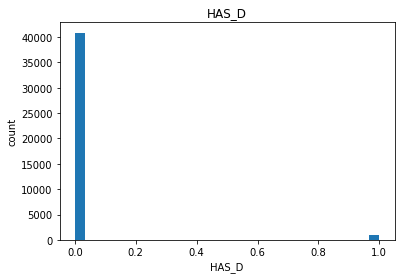

####################################################################

■ NB_INV  will be used ?  NO
■ initial name Nb investors

raw_treatment :  {'initialName': 'Nb investors', 'shouldUse': False} 

####################################################################

■ CENT  will be used ?  NO
■ initial name Centrality

raw_treatment :  {'initialName': 'Centrality', 'shouldUse': False} 

####################################################################

■ MAXINV_CENT  will be used ?  NO
■ initial name Max Investor Centrality

raw_treatment :  {'initialName': 'Max Investor Centrality', 'shouldUse': False} 

####################################################################

■ SUM_INV_CENT  will be used ?  NO
■ initial name Sum Investor Centrality

raw_treatment :  {'initialName': 'Sum Investor Centrality', 'shouldUse': False} 

####################################################################

■ MAXPORT  will be used ?  YES
■ initial name Max Portfolio

raw_treatment :  {'initi

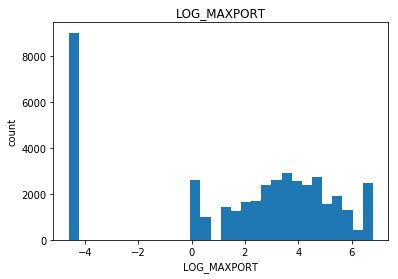

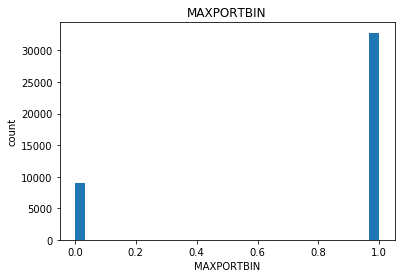

####################################################################

■ NBART  will be used ?  YES
■ initial name Nb articles total

raw_treatment :  {'initialName': 'Nb articles total', 'shouldUse': True, 'nbtransform': 2, 'farray': [<function logPerso at 0x7f62dce3a2f0>, <function isPositive at 0x7f62dce3a378>], 'names': ['LOG_NBART', 'NBARTBIN']} 



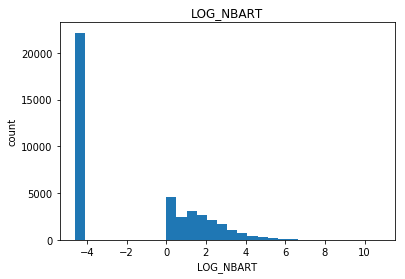

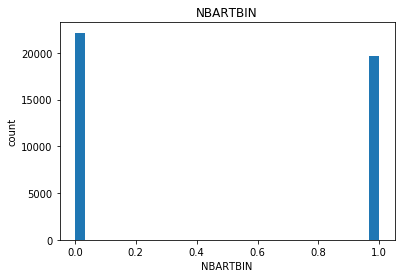

####################################################################

■ NEWSINC  will be used ?  NO
■ initial name News Increase

raw_treatment :  {'initialName': 'News Increase', 'shouldUse': False} 

####################################################################

■ NBFOUNDERS  will be used ?  YES
■ initial name Nb Founders

raw_treatment :  {'initialName': 'Nb Founders', 'shouldUse': True, 'nbtransform': 2, 'farray': [<function identityTruncate.<locals>.<lambda> at 0x7f62dce3a158>, <function isPositive at 0x7f62dce3a378>], 'names': ['NBFOUNDERS', 'HASFOUNDERS']} 



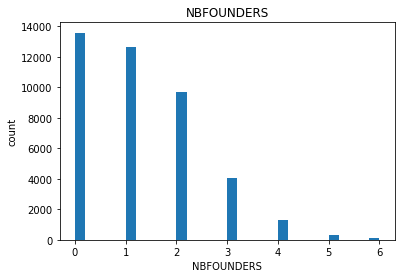

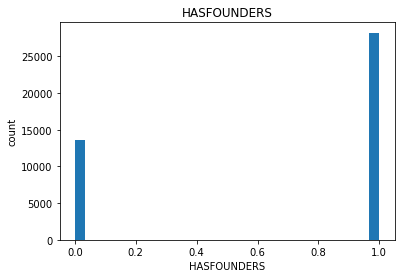

####################################################################

■ NBPREV  will be used ?  YES
■ initial name Nb Previous Startups

raw_treatment :  {'initialName': 'Nb Previous Startups', 'shouldUse': True, 'nbtransform': 2, 'farray': [<function identityTruncate.<locals>.<lambda> at 0x7f62dce3a488>, <function isPositive at 0x7f62dce3a378>], 'names': ['NBPREVFOUNDED', 'HASFOUNDED']} 



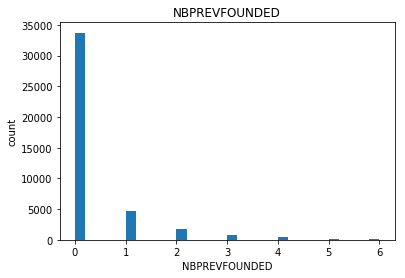

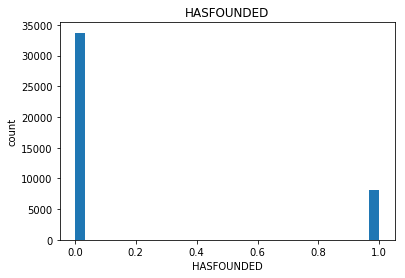

In [6]:
def plothist(X, name) : 
    plt.figure()
    plt.title("{}".format(name))
    plt.ylabel('count')
    plt.xlabel('{}'.format(name))
    plt.hist(X, bins=30)
    plt.show()

for col in DESCS.columns :
    tf = var_transform.transformations[col]
    print("####################################################################")
    print("\n■", col," will be used ? ", "YES" if tf["shouldUse"] else "NO")
    print("■ initial name {}".format(tf["initialName"]))
    print("\nraw_treatment : ",tf,"\n")
    if (tf['shouldUse']):
        VALS = DESCS[col]
        if tf['nbtransform'] :
            for j in range(tf['nbtransform']) :
                VARNAME = tf['names'][j]
                FUNCTION = tf['farray'][j]
                VAR = VALS.map(FUNCTION)
                plothist(VAR, VARNAME)
        else :
            plothist(VALS, col)

### III - Matching utils to new data

In [8]:
for Y in [2008,2013,2014]:
    with open('output_data/utils{}-2018.p'.format(Y), 'rb') as f :
        utils = pickle.load(f)

    ventures_of_utils =  set(utils['ventures100'])
    ventures_of_file = set([(utils['ventures_to_id'])[x] for x in set(DESCS.index)])

    matching_count_1 = 0
    matching_count_2= 0
    for vu in list(ventures_of_utils):
        if vu in ventures_of_file:
            matching_count_1 +=1

    for vf in ventures_of_file:
        if vf in ventures_of_utils:
            matching_count_2 +=1
    print(Y)
    print(matching_count_1, " utils matching to file")
    print(matching_count_2, " file matching to utils")
    print(len(ventures_of_utils), " ventures in utils")
    print(len(ventures_of_file), " ventures in file")
    pc_covered = round(100*(len(ventures_of_file)/len(ventures_of_utils)),1)
    print("\n■ We see that all ventures in file are included in utils. But the file covers only {}% of utils".format(pc_covered))

2008
29479  utils matching to file
29479  file matching to utils
58965  ventures in utils
41814  ventures in file

■ We see that all ventures in file are included in utils. But the file covers only 70.9% of utils
2013
28656  utils matching to file
28656  file matching to utils
44804  ventures in utils
41814  ventures in file

■ We see that all ventures in file are included in utils. But the file covers only 93.3% of utils
2014
27926  utils matching to file
27926  file matching to utils
38836  ventures in utils
41814  ventures in file

■ We see that all ventures in file are included in utils. But the file covers only 107.7% of utils


In [9]:
with open('output_data/utils{}-2018.p'.format(2014), 'rb') as f :
    utils = pickle.load(f)

ventures_of_utils =  set(utils['ventures100'])
ventures_of_file = set([(utils['ventures_to_id'])[x] for x in set(DESCS.index)])
matching_ventures = set()

matching_count_1 = 0
for vu in list(ventures_of_utils):
        if vu in ventures_of_file:
            matching_count_1 +=1
            matching_ventures.add(vu)

unmatched_ventures_in_file = ventures_of_file - matching_ventures

In [10]:

[utils['id_to_ventures'][x] for x in list(matching_ventures)[:5]]

['instart-logic', 'fiddlehead-technology', 'ripcord-2', 'modbot', 'mixcord']

In [11]:
unmatched_names = set([utils['id_to_ventures'][x] for x in list(unmatched_ventures_in_file)])

In [12]:
list(unmatched_names)[:5]

['medalogix', 'cloudrunner-i-o', 'zeeko', 'stroke-project', 'ds365-technology']

In [13]:
with open('base_data/G_98-18_2.p', 'rb') as f:
    G = pickle.load(f)

In [14]:
G['insem-spa']

AtlasView({'inv_h2i-holding-di-iniziativa-industriale': {'date': datetime.date(2014, 4, 14), 'amount': 1381851.0}})

In [15]:
G['vectormax']

AtlasView({'inv_': {'date': datetime.date(2014, 2, 13), 'amount': 50000.0}})

In [16]:
G['boataffair']

AtlasView({'inv_': {'date': datetime.date(2017, 12, 22), 'amount': 101108.0}})

In [17]:
G['xyz-reality']

AtlasView({'inv_': {'date': datetime.date(2017, 4, 1), 'amount': 501759.0}})

In [18]:
G['instart-logic']

AtlasView({'inv_wing-venture-capital': {'date': datetime.date(2012, 2, 1), 'amount': 9000000.0}, 'inv_andreessen-horowitz': {'date': datetime.date(2013, 4, 18), 'amount': 17000000.0}, 'inv_greylock': {'date': datetime.date(2013, 4, 18), 'amount': 17000000.0}, 'inv_tenaya-capital': {'date': datetime.date(2013, 4, 18), 'amount': 17000000.0}, 'inv_kleiner-perkins-caufield-byers': {'date': datetime.date(2014, 5, 13), 'amount': 26000000.0}, 'inv_hermes-growth-partners': {'date': datetime.date(2016, 1, 20), 'amount': 45000000.0}, 'inv_four-rivers-group': {'date': datetime.date(2014, 5, 13), 'amount': 26000000.0}, 'inv_singapore-technologies-telemedia-pte': {'date': datetime.date(2017, 11, 2), 'amount': 30000000.0}, 'inv_telstra-ventures': {'date': datetime.date(2016, 1, 20), 'amount': 45000000.0}, 'inv_geodesic-capital': {'date': datetime.date(2016, 1, 20), 'amount': 45000000.0}, 'inv_stanfordstartx-fund': {'date': datetime.date(2016, 1, 20), 'amount': 45000000.0}, 'inv_sutter-hill-ventures'

### IV - Creating dataframe containing infos

In [19]:
DESCSTRANSFORMED = pd.DataFrame()
for col in DESCS.columns :
    tf = var_transform.transformations[col]
    if (tf['shouldUse']):
        VALS = DESCS[col]
        if tf['nbtransform'] :
            for j in range(tf['nbtransform']) :
                
                VARNAME = tf['names'][j]
                FUNCTION = tf['farray'][j]
                VAR = VALS.map(FUNCTION)
                DESCSTRANSFORMED[VARNAME] = VAR
                print('{:15}--->  {:15} t'.format(col, VARNAME))
        else :
            DESCSTRANSFORMED[col] = VALS
            print('{:15}--->  {:15} ■'.format(col, col))
DESCSTRANSFORMED['VID'] = DESCS.index.map(utils['ventures_to_id'])

F_DATE         --->  LOG_F_DATE      t
TOTFUND        --->  LOG_TOTFUND     t
LR_DATE        --->  LOG_LR_DATE     t
LR_VALUE       --->  LOG_LR_VALUE    t
FR_DATE        --->  LOG_FR_DATE     t
HAS_S          --->  HAS_S           ■
HAS_A          --->  HAS_A           ■
HAS_B          --->  HAS_B           ■
HAS_C          --->  HAS_C           ■
HAS_D          --->  HAS_D           ■
MAXPORT        --->  LOG_MAXPORT     t
MAXPORT        --->  MAXPORTBIN      t
NBART          --->  LOG_NBART       t
NBART          --->  NBARTBIN        t
NBFOUNDERS     --->  NBFOUNDERS      t
NBFOUNDERS     --->  HASFOUNDERS     t
NBPREV         --->  NBPREVFOUNDED   t
NBPREV         --->  HASFOUNDED      t


In [20]:
DESCSTRANSFORMED[:4]

,LOG_F_DATE,LOG_TOTFUND,LOG_LR_DATE,LOG_LR_VALUE,LOG_FR_DATE,HAS_S,HAS_A,HAS_B,HAS_C,HAS_D,LOG_MAXPORT,MAXPORTBIN,LOG_NBART,NBARTBIN,NBFOUNDERS,HASFOUNDERS,NBPREVFOUNDED,HASFOUNDED,VID
fooboo,7.979685,13.017003,7.066476,13.017003,7.066476,1,0,0,0,0,5.081466,1,-4.605170,0,0,0,0,0,12102
interhomes-online,6.998519,11.913090,6.995775,11.913090,6.995775,1,0,0,0,0,-4.605170,0,-4.605170,0,0,0,0,0,13913
odesk,8.844914,18.944225,8.749100,17.727534,7.681565,0,1,1,1,1,5.676788,1,-4.605170,0,1,1,2,1,89822
fuze,8.385263,19.615815,7.024658,17.853285,6.549665,0,1,1,1,1,5.037018,1,5.081466,1,3,1,1,1,106383


In [21]:
STARTYEAR = utils['STARTDATE'][0]
utils['description'] += "\n\nAdded DESCSTRANSFORMED which is a pd.DataFrame containing infos on start-up"
pickle.dump(utils, open('output_data/utils{}-{}-descstransformed.p'.format(STARTYEAR, 2018), 'wb'), protocol=2)
print(utils['description'])
print("\n\t\t ...DONE ■" , 'output_data/utils{}-{}-descstransformed.p'.format(STARTYEAR, 2018))

■ DESCRIPTION OF UTILS 

G70 contains 52142 nodes with	 31730 ventures, 	85260 edges, dates, and amounts (and corrected) are edges labels.
G90 contains 58606 nodes with	 35560 ventures, 	100127 edges, dates, and amounts (and corrected) are edges labels.
G100 contains 64195 nodes with	 38836 ventures, 	114597 edges, dates, and amounts (and corrected) are edges labels.

These graphs are extracted respectively between :
	G70  - YEAR :2014 TRIMESTER : 1 and YEAR:2016 TRIMESTER : 4
	G90  - YEAR :2014 TRIMESTER : 1 and YEAR:2017 TRIMESTER : 2
	G100 - YEAR :2014 TRIMESTER : 1 and YEAR:2017 TRIMESTER : 4
INVTHRESHOLDINT is 262144 soit 2^18, if the number of the node is superior, it's an investor

Between G70 and G90,	 14867 edges are created, but only 5538 are from nodes in G70
Between G90 and G100,	 14470 edges are created, but only 5950 are from nodes in G90
↑ Above variables are contained in target_for_70 or _90 and target_for_70_possible and _90_possible

 It also means that there are 10^9

In [22]:
DESCSTRANSFORMED['CONNECTEDTOINV_'] = DESCSTRANSFORMED.index.map(lambda x : 1*G.has_edge("inv_",x))
DESCSTRANSFORMED['VING'] = DESCSTRANSFORMED.index.map(lambda x : 1*G.has_node(x))

G90 = utils1['G90']
DESCSTRANSFORMED['VIN90'] = DESCSTRANSFORMED['VID'].map(lambda x : 1*G90.has_node(x))

G70 = utils1['G70']
DESCSTRANSFORMED['VIN70'] = DESCSTRANSFORMED['VID'].map(lambda x : 1*G70.has_node(x))

G100 = utils1['G100']
DESCSTRANSFORMED['VIN100'] = DESCSTRANSFORMED['VID'].map(lambda x : 1*G100.has_node(x))

NameError: name 'utils1' is not defined

In [ ]:
N = DESCSTRANSFORMED.shape[0]
print(DESCSTRANSFORMED['CONNECTEDTOINV_'].sum()/N)
print(DESCSTRANSFORMED['VIN70'].sum()/N)
print(DESCSTRANSFORMED['VIN90'].sum()/N)
print(DESCSTRANSFORMED['VIN100'].sum()/N)
print(DESCSTRANSFORMED['VING'].sum()/N)

### V - Joining with previous dataframe

In [53]:
from measures_from_70_90 import dataframe_for_training, progress

IMBALANCE_FACTOR = 1

possibleTargets70 = set(utils['target_for_90_possible'])
ventures70 = utils['ventures90']
investors70 = utils['investors90']
G70 = utils['G90']

Nt = len(possibleTargets70)
Nc = IMBALANCE_FACTOR*Nt

link_sample_not_targets70 = set()

while len(link_sample_not_targets70) < Nc :
    if not(len(link_sample_not_targets70)%100):
        progress(len(link_sample_not_targets70), Nc)
        v = np.random.choice(ventures70)
    for i in np.random.choice(investors70, size=10, replace=True) : 
        if (v,i) not in possibleTargets70 :
            link_sample_not_targets70.add((v,i))
            
Nc = len(link_sample_not_targets70)


print("\n■candidats pas target : ", Nc)
print("■targets dans 70 : ", Nt, "\n\n")

Progression :  99.2% [==================================================]

■candidats pas target :  5950
■targets dans 70 :  5950 




In [54]:
%%time
dftrain = dataframe_for_training(link_sample_not_targets70,possibleTargets70, G70)
dftrain = dftrain.sample(frac=1)
print("These are the available features for each relations : " ,list(dftrain.columns))
selector =  "VDEGREE + IDEGREE + PREF + LVMAI + LIMAI + SHORT + LINKED + VMND + IMND".split(" + ")
Xtrain, Ytrain = dftrain[selector], dftrain['TARGET']

These are the available features for each relations :  ['TARGET', 'VID', 'IID', 'VDEGREE', 'IDEGREE', 'VMAI', 'IMAI', 'LVMAI', 'LIMAI', 'VMND', 'IMND', 'PREF', 'SHORT', 'LINKED']
CPU times: user 9.5 s, sys: 0 ns, total: 9.5 s
Wall time: 9.52 s


In [55]:
dftrain[:5]

,TARGET,VID,IID,VDEGREE,IDEGREE,VMAI,IMAI,LVMAI,LIMAI,VMND,IMND,PREF,SHORT,LINKED
3796,0,54966,274459,4,1,672629.216054,356.506239,13.418951,5.879153,66.25,6.000000,4,7,1
299,0,24247,263217,2,1,2000.000000,27779.388889,7.601402,10.232086,48.00,3.000000,2,9,1
11565,1,25208,297527,4,1,3103.106411,19266.055046,8.040481,9.866152,5.25,6.000000,4,5,1
11420,1,54416,304659,10,44,226942.849948,538079.918732,12.332458,13.195764,42.20,9.772727,440,3,1
9270,1,26171,265718,1,16,0.000000,21196.188445,0.000000,9.961624,11.00,9.937500,16,5,1


In [61]:
count = 0
uncount = 0
vidsDescs = set(DESCSTRANSFORMED['VID'])
for vid in np.unique(dftrain['VID']):
    if vid in vidsDescs :
        count+=1
    else :
        uncount +=1
print(count,uncount)

2395 298


In [60]:
print(DESCSTRANSFORMED.shape)
print(dftrain.shape)
print(len(np.unique(dftrain['VID'])))

(41814, 21)
(11900, 14)
2693


In [44]:
dftrain['CONNECTEDTOINV_'] = dftrain.index.map(lambda x : 1*G.has_edge("inv_",x))
dftrain['VING'] = dftrain.index.map(lambda x : 1*G.has_node(x))

G90 = utils['G90']
dftrain['VIN90'] = dftrain['VID'].map(lambda x : 1*G90.has_node(x))

G70 = utils['G70']
dftrain['VIN70'] = dftrain['VID'].map(lambda x : 1*G70.has_node(x))

G100 = utils['G100']
dftrain['VIN100'] = dftrain['VID'].map(lambda x : 1*G100.has_node(x))